In [28]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("data/student-mat-missing-data.csv", index_col=0)

In [30]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         381 non-null    float64
 3   address     390 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    object

In [32]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [33]:
df.value_counts()

school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
GP      F    15.0  R        GT3      T        1     1     at_home   other     home        mother    2           4          1         yes        yes     yes   yes         yes      yes     yes       no        3.0     1.0       2.0    1     1     1.0     2.0       7   10  10    1
        M    16.0  U        GT3      T        4     4     teacher   teacher   course      father    1           2          0         no         yes     no    yes         yes      yes     yes       no        5.0     4.0       4.0    1     2     5.0     2.0       15  15  16    1
                            LE3      T        2     2     other     other     home        mother    1           2          0         no         no      no    no          y

In [34]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [35]:
def plot_missing_values_columns(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    fig = px.bar(x=missing_values.index, y=missing_values.values,
                 labels={'x': 'Columns', 'y': 'Count'},
                 title='Null values', 
                 text=missing_values.values, 
                 width=800, height=400)
    fig.show()

    plt.figure(figsize=(10, 6))
    plt.bar(missing_values.index, missing_values.values)
    plt.ylabel('Count')
    plt.title('Null values')
    plt.show()

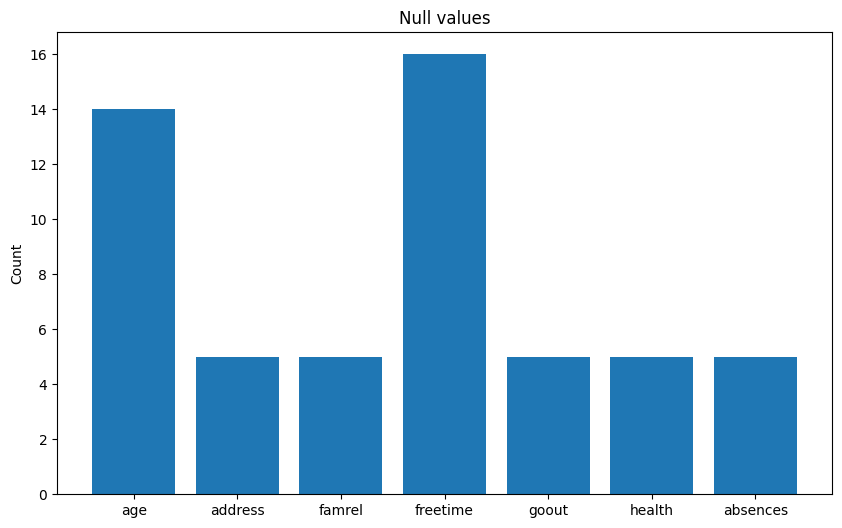

In [36]:
plot_missing_values_columns(df)

In [37]:
df[df["freetime"].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,GP,F,15.0,U,GT3,T,4,2,other,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,GP,F,16.0,U,GT3,T,4,3,other,at_home,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,GP,F,15.0,R,GT3,T,3,4,services,teacher,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,GP,M,15.0,U,LE3,A,2,1,services,other,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,GP,M,16.0,U,LE3,T,2,1,at_home,other,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,GP,M,NaN,NaN,LE3,T,2,1,at_home,other,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,GP,F,NaN,NaN,GT3,T,1,1,at_home,services,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,GP,M,19.0,U,LE3,A,4,3,services,at_home,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,GP,F,NaN,NaN,GT3,A,3,2,other,services,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,GP,F,NaN,NaN,LE3,T,3,1,services,other,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


In [38]:
df[df["freetime"].isna() | df["age"].isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,GP,M,NaN,U,GT3,T,4,3,teacher,other,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,GP,M,NaN,U,GT3,T,4,2,other,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,GP,F,15.0,U,GT3,T,4,2,other,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,GP,F,16.0,U,GT3,T,4,3,other,at_home,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,GP,M,NaN,U,GT3,T,4,4,services,other,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,GP,F,NaN,U,GT3,T,2,2,other,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,GP,M,NaN,U,GT3,T,2,2,services,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,GP,F,15.0,R,GT3,T,3,4,services,teacher,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,GP,M,15.0,U,LE3,A,2,1,services,other,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,GP,M,16.0,U,LE3,T,2,1,at_home,other,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [48]:
# Calculate the proportion of rows with at least two NaN value
num_missing_rows = df.isna().sum(axis=1)
rows_with_at_least_two_nans = df[num_missing_rows >= 2]
proportion = len(rows_with_at_least_two_nans) / len(df)
proportion

0.012658227848101266